In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [2]:
all_files = [
    'results_160m/EleutherAI_pythia-160m_wikidata_athlete.json',
    'results_160m/EleutherAI_pythia-160m_wikidata_gender.json',
    'results_160m/EleutherAI_pythia-160m_wikidata_is_alive.json',
    'results_160m/EleutherAI_pythia-160m_wikidata_occupation.json',
    'results_160m/EleutherAI_pythia-160m_wikidata_politics.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_athlete.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_gender.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_is_alive.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_occupation.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_politics.json',
]

In [3]:
all_data = {}
for f in all_files:
    with open(f,'r') as file:
        all_data[f] = json.load(file)

In [4]:
all_data['results_160m/EleutherAI_pythia-160m_wikidata_athlete.json']

{'0': {'mse_pos': 0.042807377251456426,
  'mse_whole': 0.04086013007089496,
  'l0': 32.0,
  'l1': 55.252703437443365,
  'wikidata_athlete_is_football': {'model_sel': 0.06072509288787842,
   'sae_sel': 0.05981874465942383},
  'wikidata_athlete_is_basketball': {'model_sel': -0.0033232569694519043,
   'sae_sel': -0.005740165710449219},
  'wikidata_athlete_is_baseball': {'model_sel': 0.005135953426361084,
   'sae_sel': 0.009667634963989258},
  'wikidata_athlete_is_american_football': {'model_sel': 0.005438089370727539,
   'sae_sel': 0.009365558624267578},
  'wikidata_athlete_is_icehockey': {'model_sel': -0.0021147727966308594,
   'sae_sel': 0.0033233165740966797}},
 '1': {'mse_pos': 0.08338456076487655,
  'mse_whole': 0.07874832751303912,
  'l0': 32.0,
  'l1': 47.69153627741195,
  'wikidata_athlete_is_football': {'model_sel': 0.0459214448928833,
   'sae_sel': 0.06978851556777954},
  'wikidata_athlete_is_basketball': {'model_sel': -0.0009063482284545898,
   'sae_sel': 0.005438089370727539},

In [5]:
all_datasets = []
for dataset_name in list(all_data.keys()):
    organized_data = []
    name1 = dataset_name.split('/')[-1]
    all_vals = name1.split('_')
    model_name = all_vals[1]
    data_name = '_'.join(all_vals[2:])[:-5]
    for layer in all_data[dataset_name].keys():
        data = all_data[dataset_name][layer]
        for attribute in list(data.keys()):
            if isinstance(data[attribute], dict):
                all_datasets.append(
                    {
                        'feature': attribute,
                        'layer': int(layer),
                        'model': model_name,
                        'dataset': data_name,
                        'model_sel': data[attribute]['model_sel'],
                        'sae_sel': data[attribute]['sae_sel'],
                        'mse_pos': data['mse_pos'],
                        'mse_whole': data['mse_whole'],
                        'l0': data['l0'],
                        'l1': data['l1']
                    }
                )

all_datasets = pd.DataFrame(all_datasets)

In [6]:
all_datasets.head(20)

,feature,layer,model,dataset,model_sel,sae_sel,mse_pos,mse_whole,l0,l1
0,wikidata_athlete_is_football,0,pythia-160m,wikidata_athlete,0.060725,0.059819,0.042807,0.040860,32.0,55.252703
1,wikidata_athlete_is_basketball,0,pythia-160m,wikidata_athlete,-0.003323,-0.005740,0.042807,0.040860,32.0,55.252703
2,wikidata_athlete_is_baseball,0,pythia-160m,wikidata_athlete,0.005136,0.009668,0.042807,0.040860,32.0,55.252703
3,wikidata_athlete_is_american_football,0,pythia-160m,wikidata_athlete,0.005438,0.009366,0.042807,0.040860,32.0,55.252703
4,wikidata_athlete_is_icehockey,0,pythia-160m,wikidata_athlete,-0.002115,0.003323,0.042807,0.040860,32.0,55.252703
5,wikidata_athlete_is_football,1,pythia-160m,wikidata_athlete,0.045921,0.069789,0.083385,0.078748,32.0,47.691536
6,wikidata_athlete_is_basketball,1,pythia-160m,wikidata_athlete,-0.000906,0.005438,0.083385,0.078748,32.0,47.691536
7,wikidata_athlete_is_baseball,1,pythia-160m,wikidata_athlete,0.006647,0.018429,0.083385,0.078748,32.0,47.691536
8,wikidata_athlete_is_american_football,1,pythia-160m,wikidata_athlete,0.004532,0.009668,0.083385,0.078748,32.0,47.691536
9,wikidata_athlete_is_icehockey,1,pythia-160m,wikidata_athlete,0.000906,0.012689,0.083385,0.078748,32.0,47.691536


In [7]:
all_datasets['delta_sel'] = all_datasets['sae_sel'] - all_datasets['model_sel']

In [8]:
all_datasets['delta_sel'].corr(all_datasets['mse_pos'])

0.048797449678470314

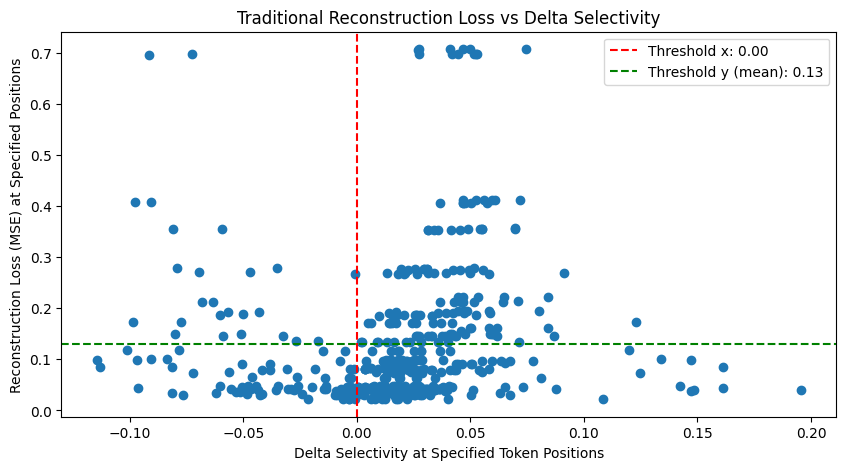

In [9]:
no_outliers = all_datasets[all_datasets['mse_pos'] < 2]
plt.figure(figsize=(10,5))
plt.scatter(no_outliers['delta_sel'], no_outliers['mse_pos'])

mean_x = 0
mean_y = np.mean(no_outliers['mse_pos'])

# Add a vertical line at the mean of x
plt.axvline(x=mean_x, color='red', linestyle='--', label=f'Threshold x: {mean_x:.2f}')

# Add a horizontal line at the mean of y
plt.axhline(y=mean_y, color='green', linestyle='--', label=f'Threshold y (mean): {mean_y:.2f}')

# Add axis labels and title
plt.xlabel('Delta Selectivity at Specified Token Positions')
plt.ylabel('Reconstruction Loss (MSE) at Specified Positions')
plt.title('Traditional Reconstruction Loss vs Delta Selectivity')
plt.legend()

plt.show()

In [10]:
list(no_outliers['feature'].unique())

['wikidata_athlete_is_football',
 'wikidata_athlete_is_basketball',
 'wikidata_athlete_is_baseball',
 'wikidata_athlete_is_american_football',
 'wikidata_athlete_is_icehockey',
 'wikidata_gender_1female_0male',
 'wikidata_1alive_0dead',
 'wikidata_occupation_is_singer',
 'wikidata_athlete_is_actor',
 'wikidata_athlete_is_politician',
 'wikidata_athlete_is_journalist',
 'wikidata_athlete_is_athlete',
 'wikidata_athlete_is_researcher',
 'wikidata_politics_1democratic_0republic']

In [11]:
# correlation per feature and model
models = ['pythia-160m', 'pythia-410m']
features = list(no_outliers['feature'].unique())
model_feature_corr = []
for m in models:
    for f in features:
        filtered = no_outliers[(no_outliers['model'] == m) & (no_outliers['feature'] == f)]
        print(f"model={m}, feature={f}, count={filtered.shape}")
        model_feature_corr.append([
            m, f, filtered['mse_pos'].corr(filtered['delta_sel']),
            filtered['mse_pos'].mean(), filtered['mse_pos'].std(),
            filtered['delta_sel'].mean(), filtered['delta_sel'].std(),
        ])

model_feature_corr = pd.DataFrame(model_feature_corr, columns=['model','feature','correl','mse_mean','mse_std','delta_sel_mean','delta_sel_std'])
model_feature_corr['abs_correl'] = model_feature_corr['correl'].abs()
model_feature_corr.sort_values(by='abs_correl',ascending=False).reset_index(drop=True)

model=pythia-160m, feature=wikidata_athlete_is_football, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_basketball, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_baseball, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_american_football, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_icehockey, count=(11, 11)
model=pythia-160m, feature=wikidata_gender_1female_0male, count=(11, 11)
model=pythia-160m, feature=wikidata_1alive_0dead, count=(11, 11)
model=pythia-160m, feature=wikidata_occupation_is_singer, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_actor, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_politician, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_journalist, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_athlete, count=(11, 11)
model=pythia-160m, feature=wikidata_athlete_is_researcher, count=(11, 11)
model=pythia-160m, feature=wikidata_politics_1democrati

,model,feature,correl,mse_mean,mse_std,delta_sel_mean,delta_sel_std,abs_correl
0,pythia-160m,wikidata_athlete_is_baseball,0.934187,0.191087,0.120576,0.023949,0.017495,0.934187
1,pythia-160m,wikidata_athlete_is_football,0.922726,0.191087,0.120576,0.032546,0.022084,0.922726
2,pythia-160m,wikidata_athlete_is_athlete,0.903483,0.191297,0.119525,0.027331,0.014554,0.903483
3,pythia-160m,wikidata_occupation_is_singer,0.887798,0.191297,0.119525,0.021143,0.011735,0.887798
4,pythia-160m,wikidata_athlete_is_american_football,0.859069,0.191087,0.120576,0.027383,0.022729,0.859069
5,pythia-160m,wikidata_politics_1democratic_0republic,-0.838297,0.193062,0.120885,0.106602,0.042997,0.838297
6,pythia-160m,wikidata_athlete_is_basketball,0.827315,0.191087,0.120576,0.021945,0.023870,0.827315
7,pythia-160m,wikidata_athlete_is_icehockey,0.811831,0.191087,0.120576,0.014502,0.021055,0.811831
8,pythia-160m,wikidata_athlete_is_politician,0.768349,0.191297,0.119525,0.027352,0.010414,0.768349
9,pythia-160m,wikidata_athlete_is_journalist,0.684124,0.191297,0.119525,0.026299,0.015607,0.684124


In [29]:
model_feature_corr[(model_feature_corr['feature'] == 'wikidata_athlete_is_icehockey')]

,model,feature,correl,mse_mean,mse_std,delta_sel_mean,delta_sel_std,abs_correl
4,pythia-160m,wikidata_athlete_is_icehockey,0.811831,0.191087,0.120576,0.014502,0.021055,0.811831
18,pythia-410m,wikidata_athlete_is_icehockey,0.455867,0.102418,0.140352,0.019789,0.020111,0.455867


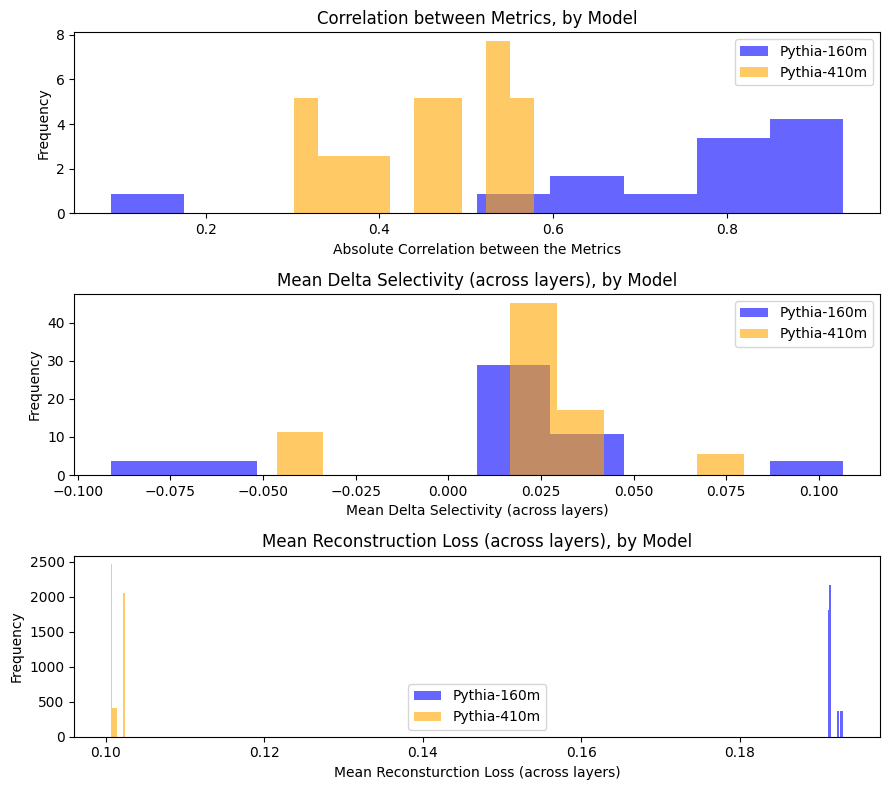

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 8))
pythia_160m = model_feature_corr[model_feature_corr['model'] == 'pythia-160m']
pythia_410m = model_feature_corr[model_feature_corr['model'] == 'pythia-410m']

# Plot histograms for both variables with density normalization
axs[0].hist(pythia_160m['abs_correl'], alpha=0.6, density=True, color='blue', label='Pythia-160m')
axs[0].hist(pythia_410m['abs_correl'], alpha=0.6, density=True, color='orange', label='Pythia-410m')
axs[0].set_xlabel('Absolute Correlation between the Metrics')
axs[0].set_ylabel('Frequency')
axs[0].set_title("Correlation between Metrics, by Model")
axs[0].legend()

axs[1].hist(pythia_160m['delta_sel_mean'], alpha=0.6, density=True, color='blue', label='Pythia-160m')
axs[1].hist(pythia_410m['delta_sel_mean'], alpha=0.6, density=True, color='orange', label='Pythia-410m')
axs[1].set_xlabel('Mean Delta Selectivity (across layers)')
axs[1].set_ylabel('Frequency')
axs[1].set_title("Mean Delta Selectivity (across layers), by Model")
axs[1].legend()

axs[2].hist(pythia_160m['mse_mean'], alpha=0.6, density=True, color='blue', label='Pythia-160m')
axs[2].hist(pythia_410m['mse_mean'], alpha=0.6, density=True, color='orange', label='Pythia-410m')
axs[2].set_xlabel('Mean Reconsturction Loss (across layers)')
axs[2].set_ylabel('Frequency')
axs[2].set_title("Mean Reconstruction Loss (across layers), by Model")
axs[2].legend()

plt.tight_layout()
plt.show()

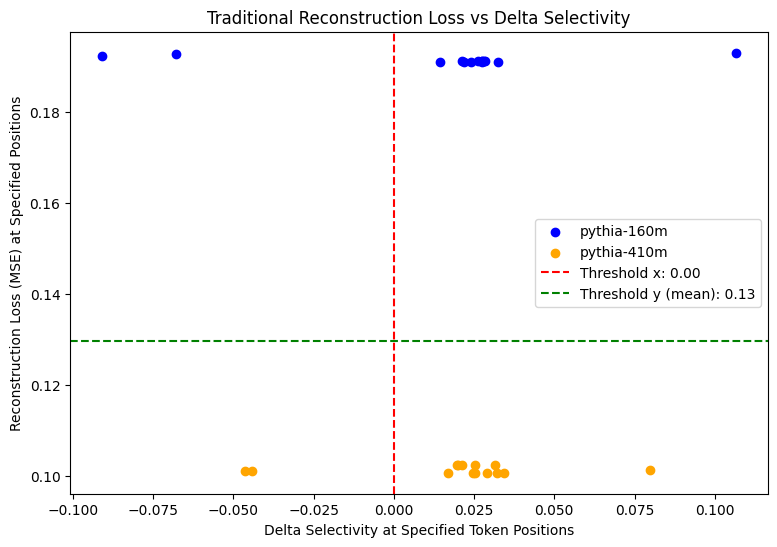

In [21]:
#fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 6))
plt.figure(figsize=(9,6))
pythia_160m = model_feature_corr[model_feature_corr['model'] == 'pythia-160m']
pythia_410m = model_feature_corr[model_feature_corr['model'] == 'pythia-410m']

plt.scatter(pythia_160m['delta_sel_mean'], pythia_160m['mse_mean'], c='blue', label='pythia-160m')
plt.scatter(pythia_410m['delta_sel_mean'], pythia_410m['mse_mean'], c='orange', label='pythia-410m')

mean_x = 0
mean_y = np.mean(no_outliers['mse_pos'])

# Add a vertical line at the mean of x
plt.axvline(x=mean_x, color='red', linestyle='--', label=f'Threshold x: {mean_x:.2f}')

# Add a horizontal line at the mean of y
plt.axhline(y=mean_y, color='green', linestyle='--', label=f'Threshold y (mean): {mean_y:.2f}')

# Add axis labels and title
plt.xlabel('Delta Selectivity at Specified Token Positions')
plt.ylabel('Reconstruction Loss (MSE) at Specified Positions')
plt.title('Traditional Reconstruction Loss vs Delta Selectivity')
plt.legend()

plt.show()

In [ ]:
all_datasets = {}
for dataset_name in list(all_data.keys()):
    organized_data = []
    name1 = dataset_name.split('/')[-1]
    all_vals = name1.split('_')
    model_name = all_vals[1]
    data_name = '_'.join(all_vals[2:])[:-5]
    for layer in all_data[dataset_name].keys():
        data = all_data[dataset_name][layer]
        data['layer'] = int(layer)
        data['model'] = model_name
        data['dataset'] = data_name
        for attribute in list(data.keys()):
            if isinstance(data[attribute], dict):
                data[f"model_sel"] = data[attribute]['model_sel']
                data[f"sae_sel"] = data[attribute]['sae_sel']
                del data[attribute]
        organized_data.append(data)
    all_datasets[dataset_name] = pd.DataFrame(organized_data)